# IS-4100 Lab: Predicting NFL Team Performance Using Multiple Linear Regression (MLR)

## Objective
In this lab, you will build a multiple linear regression model to predict a team's **points scored** in a game based on various features like offensive and defensive stats from both past and current NFL seasons.

## Dataset
- Use the `nfl_data_py` or `nflreadR` package to gather NFL data from past seasons (e.g., 2019-2023) and current in-season data.
- Some key features you could look at: passing yards, rushing yards, turnovers, penalties, possession time, and team win-loss record.

## Steps

### 1. Data Preparation
- Load and clean the dataset using `nfl_data_py` or `nflreadR`. Ensure that data from both past and current seasons is available.
- Create new features, such as averaging offensive and defensive statistics over the last 3-5 games.
- Handle missing values and ensure that the data is ready for analysis.

### 2. Feature Selection
- Identify key predictors of **points scored** for each game.
- Choose at least 5-7 features, such as:
  - Passing Yards
  - Rushing Yards
  - Turnovers
  - Penalties
  - Possession Time
  - Win-Loss Record

### 3. Model Construction
- Construct a **multiple linear regression** model to predict the number of points scored by a team.
- Use statistical tests (e.g., p-values) to evaluate the significance of each predictor.
- Analyze the coefficients to understand the contribution of each feature.

### 4. Model Evaluation
- Split the dataset into **training** and **testing** sets (e.g., 80/20 split).
- Calculate evaluation metrics for your model:
  - R² (coefficient of determination)
  - Mean Absolute Error (MAE)
  - Root Mean Squared Error (RMSE)
- Compare the performance of your multiple regression model to a simple baseline.

### 5. Comparison with Simple Linear Regression
- Build a simple linear regression model that uses only **total yards gained** as the predictor.
- Compare the results of this model with the multiple linear regression model in terms of performance metrics (R², MAE, RMSE).

### 6. In-Season Prediction
- Use your model with current in-season data to predict the outcome of upcoming NFL games.
- After the games are played, compare your model’s predictions with the actual results.

## Deliverables
- A written report summarizing:
  - Model development process
  - Feature selection and their importance
  - Model performance using evaluation metrics
  - Comparisons between multiple and simple linear regression models
- Visualizations, including:
  - Residual plots
  - Predicted vs. Actual points plots
- Insights on how well your model generalizes to the current season.

## Extra Hint
I'd recommend using the data dictionary that can be found [here](https://nflreadr.nflverse.com/articles/dictionary_pbp.html) to help with understanding and looking up various variables.

## Load Data

In [129]:
# package installs
packages_list <- c('tidyverse', 'nflfastR', 'broom', 'kableExtra', 'nflreadr', 'caret', 'plotly')
install.packages(packages_list)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’




In [137]:
# load in packages (2)
lapply(packages_list, library, character.only = TRUE)

[[1]]
 [1] "plotly"     "caret"      "lattice"    "nflreadr"   "kableExtra"
 [6] "broom"      "nflfastR"   "lubridate"  "forcats"    "stringr"   
[11] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[16] "ggplot2"    "tidyverse"  "stats"      "graphics"   "grDevices" 
[21] "utils"      "datasets"   "methods"    "base"      

[[2]]
 [1] "plotly"     "caret"      "lattice"    "nflreadr"   "kableExtra"
 [6] "broom"      "nflfastR"   "lubridate"  "forcats"    "stringr"   
[11] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[16] "ggplot2"    "tidyverse"  "stats"      "graphics"   "grDevices" 
[21] "utils"      "datasets"   "methods"    "base"      

[[3]]
 [1] "plotly"     "caret"      "lattice"    "nflreadr"   "kableExtra"
 [6] "broom"      "nflfastR"   "lubridate"  "forcats"    "stringr"   
[11] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[16] "ggplot2"    "tidyverse"  "stats"      "graphics"   "grDevices" 
[21] "utils"      "datasets"   "methods"    "base"      

[[4]]
 [1] "plotly"     "caret"      "lattice"    "nflreadr"   "kableExtra"
 [6] "broom"      "nflfastR"   "lubridate"  "forcats"    "stringr"   
[11] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[16] "ggplot2"    "tidyverse"  "stats"      "graphics"   "grDevices" 
[21] "utils"      "datasets"   "methods"    "base"      

[[5]]
 [1] "plotly"     "caret"      "lattice"    "nflreadr"   "kableExtra"
 [6] "broom"      "nflfastR"   "lubridate"  "forcats"    "stringr"   
[11] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[16] "ggplot2"    "tidyverse"  "stats"      "graphics"   "grDevices" 
[21] "utils"      "datasets"   "methods"    "base"      

[[6]]
 [1] "plotly"     "caret"      "lattice"    "nflreadr"   "kableExtra"
 [6] "broom"      "nflfastR"   "lubridate"  "forcats"    "stringr"   
[11] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[16] "ggplot2"    "tidyverse"  "stats"      "graphics"   "grDevices" 
[21] "utils"      "datasets"   "methods"    "base"      

[[7]]
 [1] "plotly"     "caret"      "lattice"    "nflreadr"   "kableExtra"
 [6] "broom"      "nflfastR"   "lubridate"  "forcats"    "stringr"   
[11] "dplyr"      "purrr"      "readr"      "tidyr"      "tibble"    
[16] "ggplot2"    "tidyverse"  "stats"      "graphics"   "grDevices" 
[21] "utils"      "datasets"   "methods"    "base"

In [94]:
# play by play data
pbp <- load_pbp(2016:2024)

In [95]:
# schedule data
schedules <- load_schedules(2016:2024)

## Data Preparation & Feature Selection

Variables to extract:
* Passing Yards
* Rushing Yards
* Offensive Penalties
* Home/Away Team
* Turnovers (interceptions & fumbles)
* Sacks Against
* Tackles for Loss Against

In [96]:
# passing data
pbp_pass <- pbp |>
  group_by(posteam, game_id) |>
  filter(
    play_type == 'pass',
    !is.na(passer_id)
  ) |>
    mutate(
      home_team = ifelse(posteam == home_team, 1, 0)
    ) |>
    summarise(
      home_team = ifelse(is.na(sum(home_team)/sum(home_team)),0,1),
      yards_per_pass = mean(yards_gained, na.rm = TRUE),
      passing_yards = sum(yards_gained, na.rm = TRUE),
      completion_pct = sum(complete_pass, na.rm = TRUE)/n(),
      completions = sum(complete_pass),
      pass_attempts = n(),
      interceptions = sum(interception == 1, na.rm = TRUE),
      offensive_penalties = sum(penalty == TRUE & penalty_team == posteam, na.rm = TRUE),
      sacks_against = sum(sack == 1)
    )

# show passing data
head(pbp_pass)

`summarise()` has grouped output by 'posteam'. You can override using the
`.groups` argument.


posteam,game_id,home_team,yards_per_pass,passing_yards,completion_pct,completions,pass_attempts,interceptions,offensive_penalties,sacks_against
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
ARI,2016_01_NE_ARI,1,6.300000,252,0.6000000,24,40,0,0,3
ARI,2016_02_TB_ARI,1,8.885714,311,0.5142857,18,35,0,0,1
ARI,2016_03_ARI_BUF,0,4.642857,260,0.4642857,26,56,4,0,5
ARI,2016_04_LA_ARI,1,6.163265,302,0.5510204,27,49,3,0,3
ARI,2016_05_ARI_SF,0,4.000000,116,0.3793103,11,29,0,0,1
ARI,2016_06_NYJ_ARI,1,6.428571,225,0.6857143,24,35,0,0,0


In [97]:
# rushing data
pbp_run <- pbp |>
  group_by(posteam, game_id) |>
  filter(
    play_type == 'run',
    !is.na(rusher_id)
  ) |>
    summarise(
      yards_per_rush = mean(yards_gained, na.rm = TRUE),
      rushing_yards = sum(yards_gained, na.rm = TRUE),
      rush_attempts = n(),
      lost_fumbles = sum(fumble_lost == 1, na.rm = TRUE),
      offensive_penalties = sum(penalty == TRUE & penalty_team == posteam),
      tfls_against = sum(tackled_for_loss == 1, na.rm = TRUE)
    )

# show rushing data
head(pbp_run)

`summarise()` has grouped output by 'posteam'. You can override using the
`.groups` argument.


posteam,game_id,yards_per_rush,rushing_yards,rush_attempts,lost_fumbles,offensive_penalties,tfls_against
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
ARI,2016_01_NE_ARI,4.842105,92,19,0,0,1
ARI,2016_02_TB_ARI,3.500000,105,30,0,0,2
ARI,2016_03_ARI_BUF,4.000000,88,22,1,0,2
ARI,2016_04_LA_ARI,4.720000,118,25,1,1,3
ARI,2016_05_ARI_SF,4.971429,174,35,0,0,3
ARI,2016_06_NYJ_ARI,5.242424,173,33,0,1,2


In [98]:
# merge into offensive_data

offensive_data <- merge(pbp_pass, pbp_run, by = c("posteam", "game_id"))

offensive_data <- offensive_data |>
  mutate(
    offensive_penalties = offensive_penalties.x + offensive_penalties.y,
    total_yards = rushing_yards + passing_yards
  ) |>
    select(-c(offensive_penalties.x, offensive_penalties.y))

head(offensive_data)

,posteam,game_id,home_team,yards_per_pass,passing_yards,completion_pct,completions,pass_attempts,interceptions,sacks_against,yards_per_rush,rushing_yards,rush_attempts,lost_fumbles,tfls_against,offensive_penalties,total_yards
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,ARI,2016_01_NE_ARI,1,6.300000,252,0.6000000,24,40,0,3,4.842105,92,19,0,1,0,344
2,ARI,2016_02_TB_ARI,1,8.885714,311,0.5142857,18,35,0,1,3.500000,105,30,0,2,0,416
3,ARI,2016_03_ARI_BUF,0,4.642857,260,0.4642857,26,56,4,5,4.000000,88,22,1,2,0,348
4,ARI,2016_04_LA_ARI,1,6.163265,302,0.5510204,27,49,3,3,4.720000,118,25,1,3,1,420
5,ARI,2016_05_ARI_SF,0,4.000000,116,0.3793103,11,29,0,1,4.971429,174,35,0,3,0,290
6,ARI,2016_06_NYJ_ARI,1,6.428571,225,0.6857143,24,35,0,0,5.242424,173,33,0,2,1,398


In [99]:
# get points scored for each game
points_data <- schedules |>
  group_by(game_id) |>
  select(home_score, away_score, season)

head(points_data)

Adding missing grouping variables: `game_id`


game_id,home_score,away_score,season
<chr>,<int>,<int>,<int>
2016_01_CAR_DEN,21,20,2016
2016_01_TB_ATL,24,31,2016
2016_01_BUF_BAL,13,7,2016
2016_01_CHI_HOU,23,14,2016
2016_01_GB_JAX,23,27,2016
2016_01_SD_KC,33,27,2016


In [100]:
# merge offensive data and points data
all_data <- merge(offensive_data, points_data, by = "game_id")

head(all_data)

,game_id,posteam,home_team,yards_per_pass,passing_yards,completion_pct,completions,pass_attempts,interceptions,sacks_against,yards_per_rush,rushing_yards,rush_attempts,lost_fumbles,tfls_against,offensive_penalties,total_yards,home_score,away_score,season
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,2016_01_BUF_BAL,BUF,0,3.958333,95,0.6250000,15,24,0,2,2.476190,52,21,0,5,0,147,13,7,2016
2,2016_01_BUF_BAL,BAL,1,6.081081,225,0.5945946,22,37,0,4,3.440000,86,25,1,2,0,311,13,7,2016
3,2016_01_CAR_DEN,CAR,0,5.176471,176,0.5294118,18,34,1,3,4.903226,152,31,0,0,2,328,21,20,2016
4,2016_01_CAR_DEN,DEN,1,5.678571,159,0.6428571,18,28,2,2,5.333333,128,24,1,1,0,287,21,20,2016
5,2016_01_CHI_HOU,HOU,1,5.810811,215,0.5945946,22,37,1,2,3.625000,116,32,0,1,0,331,23,14,2016
6,2016_01_CHI_HOU,CHI,0,5.441176,185,0.4705882,16,34,1,5,3.210526,61,19,0,4,0,246,23,14,2016


In [101]:
# update data frame points scored specific to each team
all_data <- all_data |>
  mutate(
    points_scored = ifelse(home_team == 1, home_score, away_score)
  )

head(all_data)

,game_id,posteam,home_team,yards_per_pass,passing_yards,completion_pct,completions,pass_attempts,interceptions,sacks_against,⋯,rushing_yards,rush_attempts,lost_fumbles,tfls_against,offensive_penalties,total_yards,home_score,away_score,season,points_scored
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,2016_01_BUF_BAL,BUF,0,3.958333,95,0.6250000,15,24,0,2,⋯,52,21,0,5,0,147,13,7,2016,7
2,2016_01_BUF_BAL,BAL,1,6.081081,225,0.5945946,22,37,0,4,⋯,86,25,1,2,0,311,13,7,2016,13
3,2016_01_CAR_DEN,CAR,0,5.176471,176,0.5294118,18,34,1,3,⋯,152,31,0,0,2,328,21,20,2016,20
4,2016_01_CAR_DEN,DEN,1,5.678571,159,0.6428571,18,28,2,2,⋯,128,24,1,1,0,287,21,20,2016,21
5,2016_01_CHI_HOU,HOU,1,5.810811,215,0.5945946,22,37,1,2,⋯,116,32,0,1,0,331,23,14,2016,23
6,2016_01_CHI_HOU,CHI,0,5.441176,185,0.4705882,16,34,1,5,⋯,61,19,0,4,0,246,23,14,2016,14


In [102]:
# separate data between 2024 and other years

ad_2024 <- all_data |>
  filter(
    season == 2024
  )

all_data <- all_data |>
  filter(
    season != 2024
  )

## Model Construction
Create MLR model based on chosen features.

In [103]:
points_scored_model <-
  lm(
    points_scored ~ 1 + passing_yards + rushing_yards + offensive_penalties + home_team + interceptions + lost_fumbles + sacks_against + tfls_against,
    data = all_data
  )

print(summary(points_scored_model))


Call:
lm(formula = points_scored ~ 1 + passing_yards + rushing_yards + 
    offensive_penalties + home_team + interceptions + lost_fumbles + 
    sacks_against + tfls_against, data = all_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.341  -4.776  -0.288   4.496  33.498 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.475664   0.590732   0.805 0.420742    
passing_yards        0.066623   0.001461  45.597  < 2e-16 ***
rushing_yards        0.089637   0.002282  39.285  < 2e-16 ***
offensive_penalties -1.128062   0.167493  -6.735 1.85e-11 ***
home_team            0.801369   0.212025   3.780 0.000159 ***
interceptions       -2.011687   0.115731 -17.382  < 2e-16 ***
lost_fumbles        -1.831444   0.263088  -6.961 3.87e-12 ***
sacks_against       -0.531647   0.065979  -8.058 9.93e-16 ***
tfls_against         0.359773   0.064876   5.546 3.10e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual 

### Interpreting the Summary

**Predictor Significance**

Each predictor except the intercept is significant because all the others have p-vlaue below 0.05.  However, the intercept is not far off at 0.065.  All the other variables have the lowest p-values given by R.


**Coefficient Interpretation**

Interceptions have the greatest impact on the amount of points a team scores since its value is -2.01, followed by fumbles lost (-1.83), and offensive penalties (-1.12).  Passing and rushing yards have the lowest coefficient values because their value is almost always larger than all other variables.  Shockingly, as the amount of tackles for loss a team takes goes up by one, they are expected to score 0.36 more points.  Also according to the model, being the home team accounts for about 0.80 points.

## Model Evaluation

### Split Data (80/20)

In [104]:
# split data using caret package

# set seed
set.seed(100)

# split data 80/20
train_index = createDataPartition(all_data$points_scored, p = 0.8, list = FALSE)

# set training and testing data
train_data  <- all_data[train_index, ]
test_data <- all_data[-train_index, ]

# check sizes to ensure 80/20 split
print(paste("Training rows: ", nrow(train_data)))
print(paste("Testing rows: ", nrow(test_data)))

[1] "Training rows:  3506"
[1] "Testing rows:  876"


### Evaluation of Model
R², Mean Absolute Error, Root Mean Squared Error

In [105]:
# rebuild model with training_data
points_scored_model <-
  lm(
    points_scored ~ 1 + passing_yards + rushing_yards + offensive_penalties + home_team + interceptions + lost_fumbles + sacks_against + tfls_against,
    data = train_data
  )

print(summary(points_scored_model))


Call:
lm(formula = points_scored ~ 1 + passing_yards + rushing_yards + 
    offensive_penalties + home_team + interceptions + lost_fumbles + 
    sacks_against + tfls_against, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.293  -4.764  -0.386   4.489  33.414 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.924917   0.659238   1.403 0.160703    
passing_yards        0.066407   0.001629  40.765  < 2e-16 ***
rushing_yards        0.087468   0.002567  34.073  < 2e-16 ***
offensive_penalties -1.147858   0.186279  -6.162 8.00e-10 ***
home_team            0.828832   0.236419   3.506 0.000461 ***
interceptions       -2.066364   0.128841 -16.038  < 2e-16 ***
lost_fumbles        -1.606539   0.298334  -5.385 7.72e-08 ***
sacks_against       -0.586763   0.073351  -7.999 1.69e-15 ***
tfls_against         0.352732   0.072308   4.878 1.12e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residua

In [106]:
# make predictions using new model
preds <- predict(points_scored_model, newdata = test_data)

test_data_copy <- test_data

test_data_copy['preds'] = preds

test_data_copy['error'] = test_data_copy$points_scored - test_data_copy$preds

head(test_data_copy)

,game_id,posteam,home_team,yards_per_pass,passing_yards,completion_pct,completions,pass_attempts,interceptions,sacks_against,⋯,lost_fumbles,tfls_against,offensive_penalties,total_yards,home_score,away_score,season,points_scored,preds,error
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
6,2016_01_CHI_HOU,CHI,0,5.441176,185,0.4705882,16,34,1,5,⋯,0,4,0,246,23,14,2016,14,14.95650,-0.9565044
9,2016_01_CLE_PHI,PHI,1,6.923077,270,0.5641026,22,39,0,2,⋯,0,1,0,402,29,10,2016,29,30.40863,-1.4086292
11,2016_01_DET_IND,IND,1,7.400000,370,0.6200000,31,50,0,2,⋯,0,1,0,432,35,39,2016,35,30.92653,4.0734705
16,2016_01_LA_SF,LA,0,3.243243,120,0.4594595,17,37,2,2,⋯,0,1,1,181,28,0,2016,0,8.12793,-8.1279297
18,2016_01_MIA_SEA,SEA,1,5.217391,240,0.5869565,27,46,1,3,⋯,1,3,1,339,12,10,2016,12,20.82791,-8.8279082
19,2016_01_MIN_TEN,TEN,1,5.727273,252,0.5681818,25,44,1,2,⋯,2,4,0,316,16,25,2016,16,19.04421,-3.0442111


### Evaluation Metrics

In [107]:
# r-squared
r2 <- summary(points_scored_model)$r.squared

# MAE
test_data_copy <- test_data_copy |>
  mutate(
    abs_err = ifelse(error < 0, error * -1, error)
  )

mae = mean(test_data_copy$abs_err)

# RMSE
rmse <- sqrt(mean(test_data_copy$error^2))

print(paste("R squared: ", round(r2, 3)))
print(paste("Mean absolute error: ", round(mae, 3)))
print(paste("Root Mean Squared Error: ", round(rmse, 3)))

[1] "R squared:  0.514"
[1] "Mean absolute error:  5.522"
[1] "Root Mean Squared Error:  7.066"


### Interpretation of metrics
**R-squared of 0.511**: about 50% of the data's variability can be accounted for by the model.

**MAE of 5.543**: The model is off by an average of 5.543 points (less than a touchdown)

### Create Baseline Model (MLR)

Create baseline simple linear regression model based on only passing yards.

In [108]:
# baseline model of points_scored ~ passing_yards + rushing_yards + interceptions

baseline_model = lm(points_scored ~ 1 + passing_yards + rushing_yards + interceptions, data = train_data)

summary(baseline_model)


Call:
lm(formula = points_scored ~ 1 + passing_yards + rushing_yards + 
    interceptions, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-20.274  -4.936  -0.319   4.691  34.892 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.875194   0.518374  -1.688   0.0914 .  
passing_yards  0.069157   0.001580  43.769   <2e-16 ***
rushing_yards  0.092073   0.002513  36.643   <2e-16 ***
interceptions -2.255963   0.130579 -17.277   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.144 on 3502 degrees of freedom
Multiple R-squared:  0.4897,	Adjusted R-squared:  0.4893 
F-statistic:  1120 on 3 and 3502 DF,  p-value: < 2.2e-16


### Compare to Baseline

In [109]:
# add baseline predictions to data
# make predictions using new model
preds <- predict(baseline_model, newdata = test_data_copy)

test_data_copy['preds_b'] = preds

test_data_copy['error_b'] = test_data_copy$points_scored - test_data_copy$preds_b

head(test_data_copy)

,game_id,posteam,home_team,yards_per_pass,passing_yards,completion_pct,completions,pass_attempts,interceptions,sacks_against,⋯,total_yards,home_score,away_score,season,points_scored,preds,error,abs_err,preds_b,error_b
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,2016_01_CHI_HOU,CHI,0,5.441176,185,0.4705882,16,34,1,5,⋯,246,23,14,2016,14,14.95650,-0.9565044,0.9565044,15.279417,-1.2794169
9,2016_01_CLE_PHI,PHI,1,6.923077,270,0.5641026,22,39,0,2,⋯,402,29,10,2016,29,30.40863,-1.4086292,1.4086292,29.950952,-0.9509522
11,2016_01_DET_IND,IND,1,7.400000,370,0.6200000,31,50,0,2,⋯,432,35,39,2016,35,30.92653,4.0734705,4.0734705,30.421559,4.5784407
16,2016_01_LA_SF,LA,0,3.243243,120,0.4594595,17,37,2,2,⋯,181,28,0,2016,0,8.12793,-8.1279297,8.1279297,8.528228,-8.5282276
18,2016_01_MIA_SEA,SEA,1,5.217391,240,0.5869565,27,46,1,3,⋯,339,12,10,2016,12,20.82791,-8.8279082,8.8279082,22.581853,-10.5818530
19,2016_01_MIN_TEN,TEN,1,5.727273,252,0.5681818,25,44,1,2,⋯,316,16,25,2016,16,19.04421,-3.0442111,3.0442111,20.189178,-4.1891779


In [110]:
# baseline accuracy metrics

# r-squared
r2 <- summary(baseline_model)$r.squared

# MAE
test_data_copy <- test_data_copy |>
  mutate(
    abs_err_b = ifelse(error_b < 0, error_b * -1, error_b)
  )

mae = mean(test_data_copy$abs_err_b)

# RMSE
rmse <- sqrt(mean(test_data_copy$error_b^2))

print(paste("R squared: ", round(r2, 3)))
print(paste("Mean absolute error: ", round(mae, 3)))
print(paste("Root Mean Squared Error: ", round(rmse, 3)))

[1] "R squared:  0.49"
[1] "Mean absolute error:  5.656"
[1] "Root Mean Squared Error:  7.207"


**MLR Model:**
1. R-squared: 0.513
2. MAE: 5.574
3. RMSE: 7.126

**Baseline Model:**
1. R-squared: 0.490
2. MAE: 5.656
3. RMSE: 7.207

The MLR model is better using all three of the previous metrics, but only by a slight margin.  The r-squared values is only 0.23 lower, and the MAE and RMSE are comparable.

### MLR and Baseline Plots

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


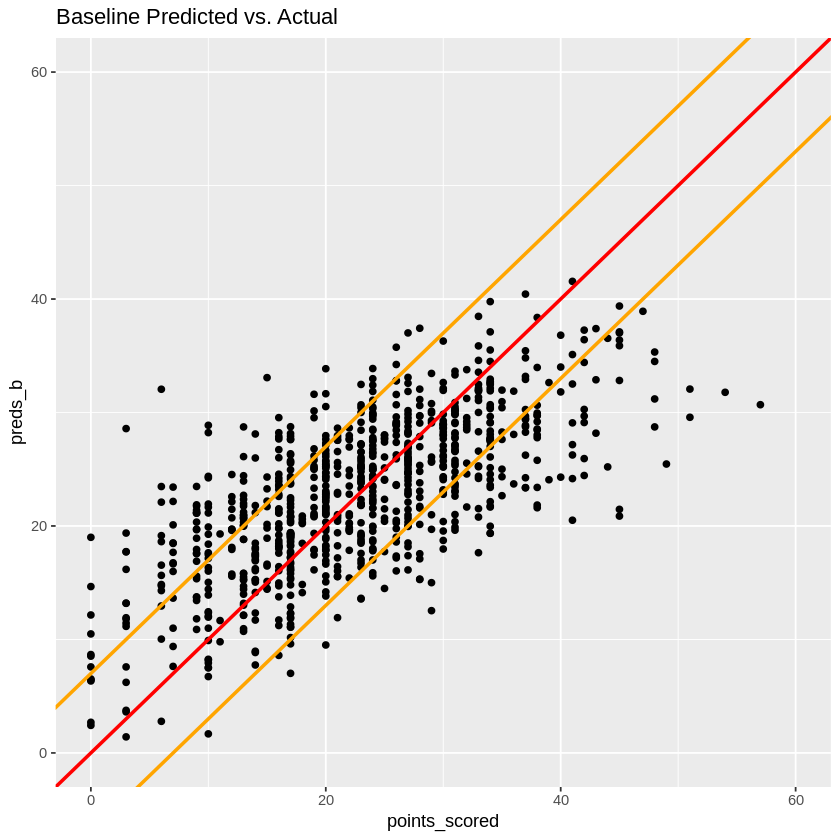

In [111]:
# predicted vs. actual plot (baseline)
b_plot <- ggplot(test_data_copy, aes(x = points_scored, y = preds_b)) +
  geom_point() +
  xlim(0,60) +
  ylim(0,60) +
  # perfect fit
  geom_abline(intercept = 0, slope = 1, color = 'red', size = 1) +
  # 7 point error bars
  geom_abline(intercept = 7, slope = 1, color = 'orange', size = 1) +
  geom_abline(intercept = -7, slope = 1, color = 'orange', size = 1) +
  ggtitle("Baseline Predicted vs. Actual")


b_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


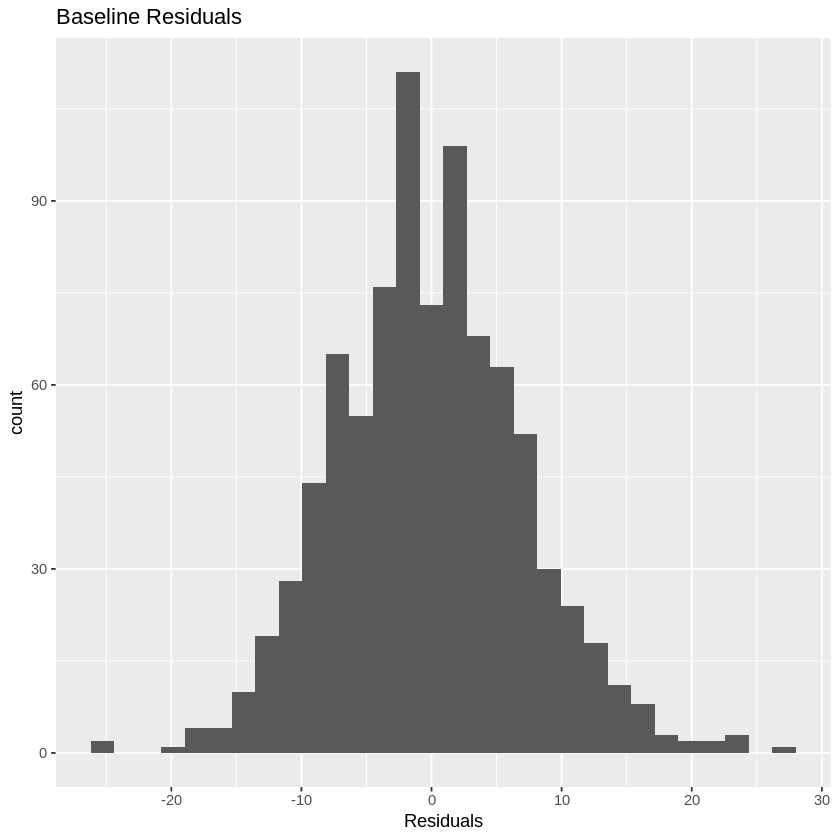

In [149]:
# baseline residuals
ggplot(test_data_copy, aes(x = error_b)) +
  geom_histogram() +
  xlab("Residuals") +
  ggtitle("Baseline Residuals")

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”


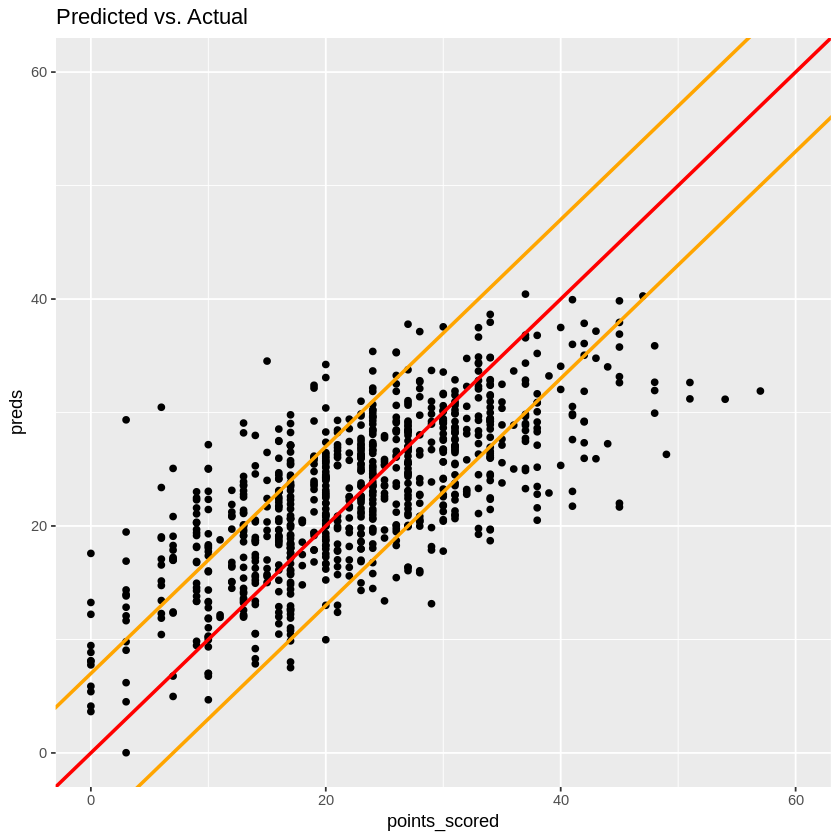

In [112]:
# predicted vs. actual (mlr)
a_plot <- ggplot(test_data_copy, aes(x = points_scored, y = preds)) +
  geom_point() +
  xlim(0,60) +
  ylim(0,60) +
  # perfect fit
  geom_abline(intercept = 0, slope = 1, color = 'red', size = 1) +
  # 7 point error bars
  geom_abline(intercept = 7, slope = 1, color = 'orange', size = 1) +
  geom_abline(intercept = -7, slope = 1, color = 'orange', size = 1) +
  ggtitle("Predicted vs. Actual")


a_plot

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


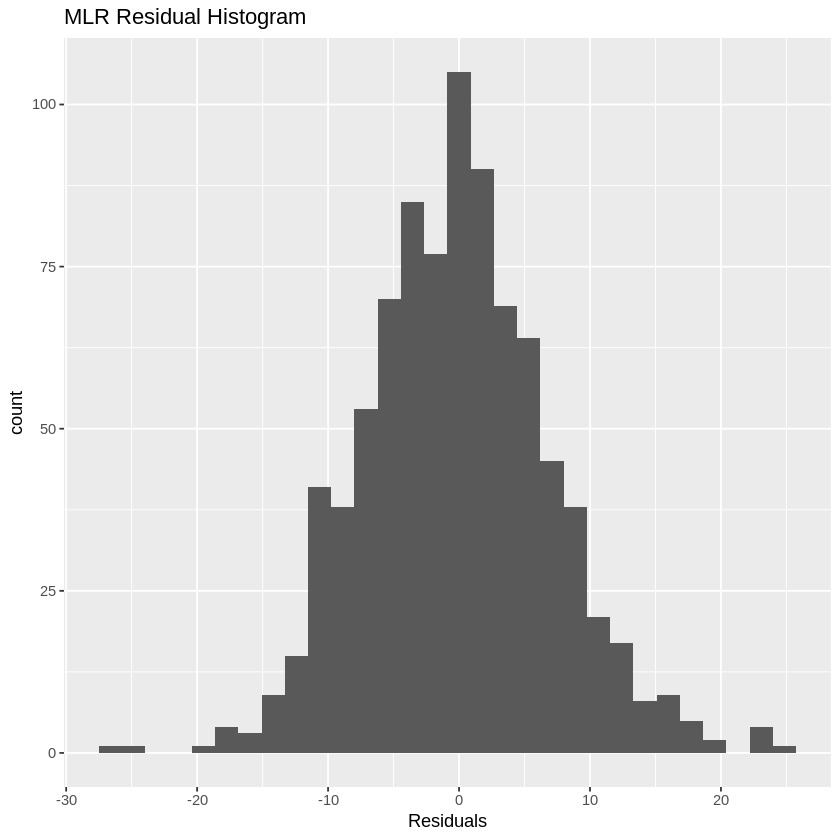

In [150]:
# Residuals
ggplot(test_data_copy, aes(x = error)) +
  geom_histogram() +
  xlab("Residuals") +
  ggtitle("MLR Residual Histogram")

## Comparison with Simple Linear Regression

In [113]:
slr_model = lm(points_scored ~ 1 + total_yards,
                data = test_data_copy)

summary(slr_model)


Call:
lm(formula = points_scored ~ 1 + total_yards, data = test_data_copy)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.956  -4.868  -0.303   4.448  27.006 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.135905   1.041532  -3.011  0.00268 ** 
total_yards  0.077118   0.003004  25.668  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.553 on 874 degrees of freedom
Multiple R-squared:  0.4298,	Adjusted R-squared:  0.4292 
F-statistic: 658.8 on 1 and 874 DF,  p-value: < 2.2e-16


In [115]:
# evaluation metrics

# add slr predictions to data
# make predictions using new model
preds <- predict(slr_model, newdata = test_data_copy)

test_data_copy['preds_s'] = preds

test_data_copy['error_s'] = test_data_copy$points_scored - test_data_copy$preds_s

head(test_data_copy)

# r-squared
r2 <- summary(slr_model)$r.squared

# MAE
test_data_copy <- test_data_copy |>
  mutate(
    abs_err_slr = ifelse(error_s < 0, error_s * -1, error_s)
  )

mae = mean(test_data_copy$abs_err_s)

# RMSE
rmse <- sqrt(mean(test_data_copy$error_s^2))

print(paste("R squared: ", round(r2, 3)))
print(paste("Mean absolute error: ", round(mae, 3)))
print(paste("Root Mean Squared Error: ", round(rmse, 3)))

,game_id,posteam,home_team,yards_per_pass,passing_yards,completion_pct,completions,pass_attempts,interceptions,sacks_against,⋯,season,points_scored,preds,error,abs_err,preds_b,error_b,abs_err_b,preds_s,error_s
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,2016_01_CHI_HOU,CHI,0,5.441176,185,0.4705882,16,34,1,5,⋯,2016,14,14.95650,-0.9565044,0.9565044,15.279417,-1.2794169,1.2794169,15.83523,-1.835228
9,2016_01_CLE_PHI,PHI,1,6.923077,270,0.5641026,22,39,0,2,⋯,2016,29,30.40863,-1.4086292,1.4086292,29.950952,-0.9509522,0.9509522,27.86570,1.134298
11,2016_01_DET_IND,IND,1,7.400000,370,0.6200000,31,50,0,2,⋯,2016,35,30.92653,4.0734705,4.0734705,30.421559,4.5784407,4.5784407,30.17926,4.820745
16,2016_01_LA_SF,LA,0,3.243243,120,0.4594595,17,37,2,2,⋯,2016,0,8.12793,-8.1279297,8.1279297,8.528228,-8.5282276,8.5282276,10.82253,-10.822530
18,2016_01_MIA_SEA,SEA,1,5.217391,240,0.5869565,27,46,1,3,⋯,2016,12,20.82791,-8.8279082,8.8279082,22.581853,-10.5818530,10.5818530,23.00724,-11.007241
19,2016_01_MIN_TEN,TEN,1,5.727273,252,0.5681818,25,44,1,2,⋯,2016,16,19.04421,-3.0442111,3.0442111,20.189178,-4.1891779,4.1891779,21.23352,-5.233518


[1] "R squared:  0.43"
[1] "Mean absolute error:  5.844"
[1] "Root Mean Squared Error:  7.544"


### Compare All Models

**MLR Complete**
1. R-squared: 0.513
2. MAE: 5.574
3. RMSE: 7.126

**MLR Baseline**
1. R-squared: 0.490
2. MAE: 5.656
3. RMSE: 7.207

**SLR**
1. R-squared:  0.43"
2. MAE:  5.844"
3. RMSE:  7.544"


## In-Season Prediction

In [119]:
# add baseline predictions to data
# make predictions using new model
preds <- predict(points_scored_model, newdata = ad_2024)

ad_2024['preds_cur'] = preds

ad_2024['error_cur'] = ad_2024$points_scored - ad_2024$preds_cur

head(ad_2024)

,game_id,posteam,home_team,yards_per_pass,passing_yards,completion_pct,completions,pass_attempts,interceptions,sacks_against,⋯,lost_fumbles,tfls_against,offensive_penalties,total_yards,home_score,away_score,season,points_scored,preds_cur,error_cur
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,2024_01_ARI_BUF,ARI,0,4.171429,146,0.6000000,21,35,0,4,⋯,0,1,0,226,34,28,2024,28,15.623467,12.376533
2,2024_01_ARI_BUF,BUF,1,8.880000,222,0.7200000,18,25,0,2,⋯,0,4,2,320,34,28,2024,34,23.009656,10.990344
3,2024_01_BAL_KC,KC,1,9.366667,281,0.6666667,20,30,1,2,⋯,0,1,0,350,27,20,2024,27,23.562234,3.437766
4,2024_01_BAL_KC,BAL,0,6.357143,267,0.6190476,26,42,0,1,⋯,0,1,0,377,27,20,2024,20,28.043035,-8.043035
5,2024_01_CAR_NO,CAR,0,3.857143,135,0.3714286,13,35,2,4,⋯,1,1,0,181,47,10,2024,10,6.179801,3.820199
6,2024_01_CAR_NO,NO,1,7.960000,199,0.7600000,19,25,0,1,⋯,0,3,0,371,47,10,2024,47,30.484703,16.515297


### Plot Predictions vs. Actual for 2024

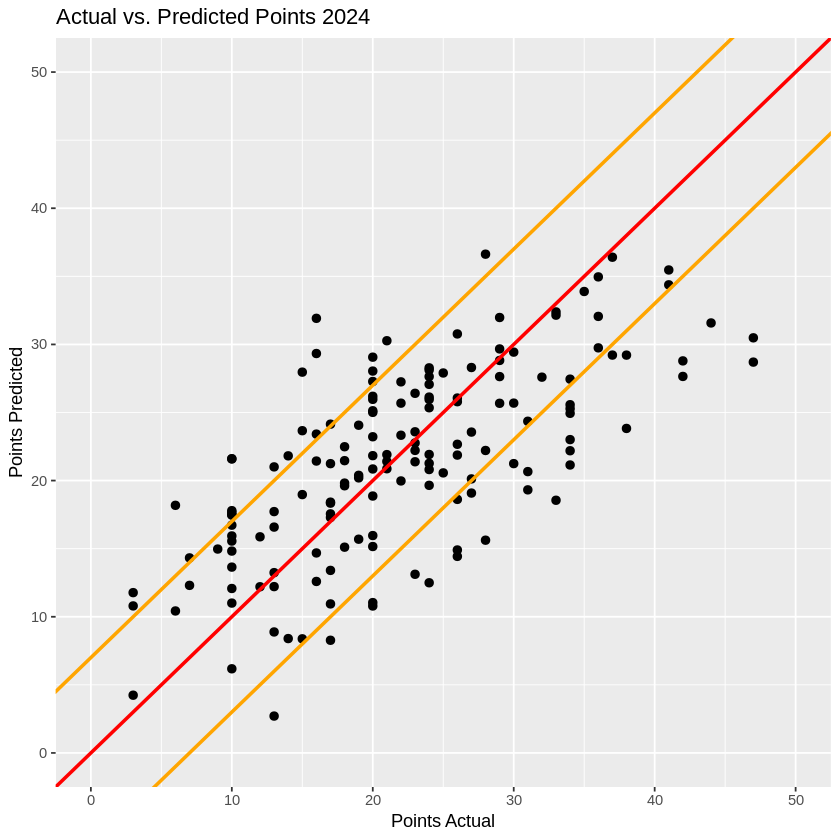

In [140]:
plot1 <- ggplot(ad_2024, aes(x = points_scored, y = preds_cur)) +
  geom_point(size = 2) +
  # perfect fit
  geom_abline(intercept = 0, slope = 1, color = 'red', size = 1) +
  # 7 point error bars
  geom_abline(intercept = 7, slope = 1, color = 'orange', size = 1) +
  geom_abline(intercept = -7, slope = 1, color = 'orange', size = 1) +
  xlim(0,50) +
  ylim(0,50) +
  xlab("Points Actual") +
  ylab("Points Predicted") +
  ggtitle("Actual vs. Predicted Points 2024")

plot1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


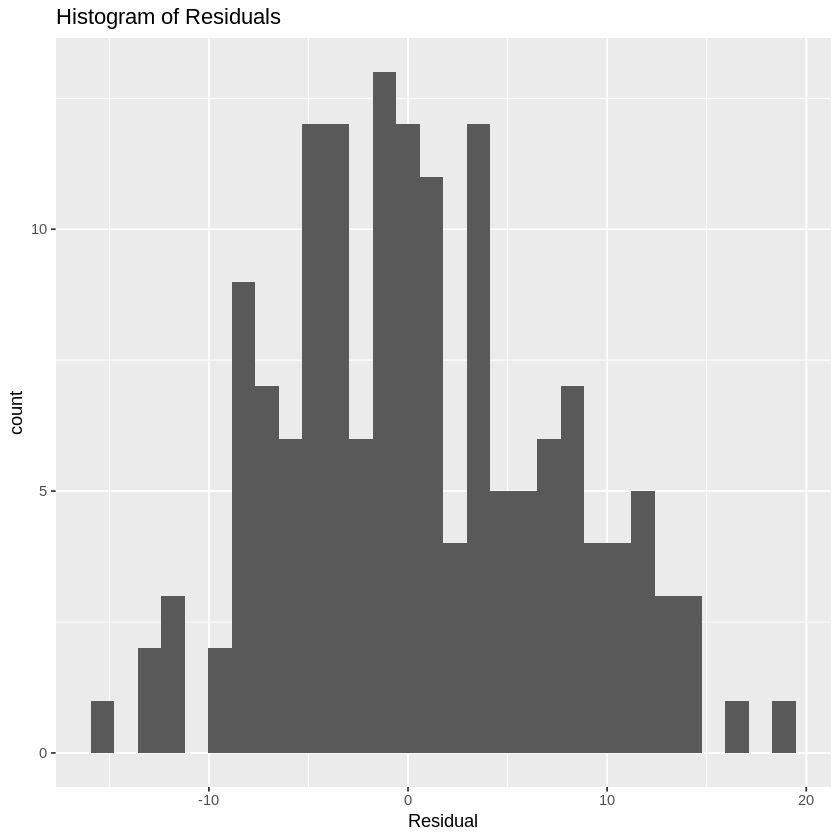

In [146]:
# residual plot
hist <- ggplot(ad_2024, aes(x = error_cur)) +
  geom_histogram() +
  xlab("Residual") +
  ggtitle("Histogram of Residuals")

hist

In [143]:
# evaluation metrics
mae <- round(mean(abs(ad_2024$error_cur)),3)

rmse <- round(sqrt(mean(ad_2024$error_cur^2)),3)

print(paste("MAE: ", mae))
print(paste("RMSE: ", rmse))

[1] "MAE:  5.501"
[1] "RMSE:  6.838"


Based on the MAE and RMSE, my model actually is slightly more accurate for the 2024 season than for the testing and training data of the previous seasons.

**2024 MAE:** 5.501

**2024 RMSE:** 6.838


**Test MAE:** 5.574

**Test RMSE:** 7.126